## <center>Распознавание лиц и  эмоций</center>

<img src='https://habrastorage.org/webt/ic/ul/rp/iculrpbc7niyrdxg1yk_8r82nsw.jpeg'>

# 1. Что это такое 

**Обнаружение объекта** - это метод компьютерного зрения, при котором программная система может обнаруживать, определять местонахождение и отслеживать объект по заданному изображению или видео. Особый атрибут обнаружения объекта заключается в том, что он определяет **класс объекта** (человек, стол, стул и т. Д.) И их **координаты**, зависящие от местоположения на данном изображении. Местоположение указывается путем рисования ограничительной **рамки** вокруг объекта. Ограничивающая рамка может точно определять положение объекта, а может и нет. Возможность найти объект внутри изображения определяет производительность алгоритма, используемого для обнаружения.

Эти алгоритмы обнаружения объектов могут быть предварительно обучены или обучены с нуля. В большинстве случаев мы используем предварительно обученные веса из предварительно обученных моделей, а затем настраиваем их в соответствии с нашими требованиями и различными вариантами использования.

 # 2. Чем задача детекции отличается от классификации

<img src='https://drek4537l1klr.cloudfront.net/elgendy/v-8/Figures/07_img_0001.png'>

**Классификация изображений** - это задача, при которой мы назначаем **метку класса** входному изображению. Например, для входного изображения кошки на выходе алгоритма классификации изображений будет метка «Кошка».

При обнаружении объектов нас интересуют не только объекты, присутствующие во входном изображении. Нас также интересует, где они находятся во входном изображении. В этом смысле обнаружение объектов выходит за рамки классификации изображений.

В большинстве приложений с несколькими объектами на входном изображении нам нужно найти расположение объектов, а затем классифицировать их. В таких случаях мы используем алгоритм обнаружения объектов.

Обнаружение объектов может быть в сотни раз медленнее, чем классификация изображений. Поэтому в приложениях, где расположение объекта на изображении не важно, мы используем классификацию изображений.

## 1. Object detector

Проще говоря, **обнаружение объекта** - это двухэтапный процесс:

* Найдите ограничивающие **прямоугольники**, содержащие объекты, так чтобы в каждом ограничивающем прямоугольнике был только **один объект**.
* Классифицируйте изображение внутри каждого ограничивающего прямоугольника и присвойте ему **метку**.

## 1.1 Sliding Window Approach

<img src='https://raw.githubusercontent.com/PnYuan/Practice-of-Machine-Learning/master/imgs/object_detect/concept_sliding_windows.gif'>

Большинство классических методов компьютерного зрения для обнаружения объектов, таких как каскады HAAR и HOG + SVM, используют метод скользящего окна для обнаружения объектов.

В этом подходе скользящее окно перемещается по изображению. Все пиксели внутри этого скользящего окна обрезаются и отправляются классификатору изображений.

Если классификатор изображения идентифицирует известный объект, ограничивающая рамка и метка класса сохраняются. В противном случае оценивается следующее окно.

Подход со скользящим окном является очень дорогостоящим в вычислительном отношении. Чтобы обнаруживать объекты на входном изображении, необходимо оценивать скользящие окна с разными масштабами и соотношениями сторон для каждого пикселя изображения.

## 1.2 Two-shot Detectors

### 1.2.1 R-CNN Object Detector

[Статья(2013)](https://arxiv.org/abs/1311.2524)

Поэтому подход на основе скользящего окна для обнаружения объектов был исключен. Это было слишком дорого.  Исследователи начали работать над новой идеей обучения модели машинного обучения, которая могла бы предлагать местоположения ограничивающих рамок, содержащих объекты. Эти ограничивающие рамки назывались предложениями регионов или предложениями объектов.

Предложения по регионам представляли собой просто списки ограничивающих рамок с небольшой вероятностью содержания объекта. Он не знал и не заботился о том, какой объект находится в ограничивающей рамке.

**Алгоритм предложения региона** выводит список из нескольких **сотен ограничивающих рамок** в разных местах, масштабах и соотношениях сторон. Большинство этих ограничивающих рамок НЕ содержат никаких объектов.  

Оценка классификатора изображений в нескольких сотнях ограничивающих прямоугольников, предложенных алгоритмом предложения региона, намного дешевле, чем его оценка в сотнях тысяч или даже миллионах ограничивающих прямоугольников в случае подхода со скользящим окном. Следовательно, алгоритм предложения региона по-прежнему полезен и временами удобен.

Один из первых подходов, в которых использовались предложения по регионам, был назван [Россом Гиршиком](https://www.rossgirshick.info/) и др. R-CNN (сокращение от Regions with CNN features).

<img src='https://habrastorage.org/webt/2r/2p/kp/2r2pkpcoysglv4z_v-ll_y14mqw.png'>

R-CNN (Region Convolution Neural Network) - это одна из первых архитектур для решения задачи object detection на основе сверточных нейронных сетей.
Данная архитектура состоит из трех частей:

1. **Классический алгоритм** компьютерного зрения, который находит области изображения, на которых потенциально могут содержаться объекты

2. **Сверточная нейронная сеть**, которая запускается по-отдельности в каждом найденном регионе и выдает набор фичей.

3. **SVM алгоритм**, который обучается на этих фичах определять те или иные классы.

Они использовали алгоритм под названием [**Selective Search**](https://www.koen.me/research/pub/uijlings-ijcv2013-draft.pdf) для обнаружения 2000 предложений регионов и запустили классификатор изображений на основе CNN + SVM на этих 2000 ограничивающих прямоугольниках.

Более подробно про алгоритм [здесь](https://www.pyimagesearch.com/2020/06/29/opencv-selective-search-for-object-detection/).
Он позволяет составить набор гипотез (класс объекта пока не имеет значения) и на основе сегментации определить границы объектов по интенсивности пикселей, перепаду цветов, контраста и текстур.

<img src='https://images.deepai.org/converted-papers/1802.02522/images/selective_search.jpg' width=600>

Точность R-CNN в то время была на высшем уровне, но скорость все еще была очень низкой (порядка 1 минуты на изображение на графическом процессоре).

Архитектура R-CNN:
Отличается от других рассмотренных на уроке архитектур для object detection следующими особенностями:
1) Использует алгоритмы классического машинного обучения для классификации изображений и для регрессии при уточнении координат рамок. Не допускает их параллельную работу.
2) Все гипотезы, предложенные алгоритмом selective search, обрабатываются отдельно нейронной сетью.

Плюсы:
1) Одна из ранних архитектур, в своё время особо не было альтернатив.

Минусы:
1) Множество гипотез практически дублируют друг друга, при этом все они отдельно обрабатываются. Вычислительные ресурсы используются неэффективно.
2) Медленная работа ввиду причин, указанных выше.

Трудности:
1) Невозможность использования алгоритма в реальном времени ввиду больших вычислительных затрат.

### 1.2.2 Fast R-CNN Object Detector

[статья(2015)](https://arxiv.org/abs/1504.08083)

Но классификация 2000 картинок - это прям очень дорого! Поэтому решили ускорить процесс. Для этого алгоритм selective search Росс Гиршик доработал и значительно ускорили процесс. 

Идея заключалась в том, чтобы рассчитать **одну карту** характеристик для всего изображения вместо 2000 карт характеристик для 2000 регионов. 

Идея заключалась в том, что все вот эти **регионы** очень сильно **пересекались**. И все свертки и остальное мы вычисляем очень много-много раз для одних и тех же пикселей. И вопрос: можно ли это все как-то вычислять по-быстрее, не делать одних и тех же вычислений на одинаковых пикселях?  
И из-за работы свертки вытекает один способ как это можно сделать:

**Для каждого предложения региона объединяющий слой области интересов (RoI) извлекал вектор признаков фиксированной длины из карты признаков**. Затем каждый вектор признаков использовался для двух целей:  
* Отнесите регион к одному из классов (например, собака, кошка, фон).
* Повысьте точность исходного ограничивающего прямоугольника с помощью регрессора ограничивающего прямоугольника.

<img src='https://www.pvsm.ru/images/2019/07/10/viju-znachit-sushestvuyu-obzor-Deep-Learning-v-Computer-Vision-chast-2-8.png'>


С этими изменениями алгоритм детектирования стал работать примерно за 3 секунды на изображение.

### 1.2.3 Faster R-CNN Object Detector

[статья(2015)](https://arxiv.org/abs/1506.01497)  
[Реализация в pytorch(torchvision)](https://pytorch.org/vision/stable/models.html#faster-r-cnn)

<img src='https://habrastorage.org/webt/6v/h_/ye/6vh_yee2zrsflyhh8jdvtm_bbgy.png'>

Идея следующая - **регионы предложений тоже генерировать нейросетью**.

План следующий. 
* Мы берем картинку. Мы прогоняем свертки через всю картинку разом и в результате получаем наш feature maps, из которого мы раньше делали pooling и классифицировали какой там объект.  
* Будем же использовать этот feature maps для того, что бы предсказывать какие у нас регионы.
* Мы будем **тренировать** дополнительную систему (маленькую **сеть**) Region Proposal Network.

Пока что такая система конекта сетей - лучшая для решения задачи детекции. 
Время работы теперь порядка 0.2 секунды на изображение.

**Faster R-CNN** является эволюционным шагом относительно предыдущих методов обнаружения объектов, таких как R-CNN и Fast R-CNN. Архитектура Faster R-CNN включает две основные составляющие: региональную свёрточную сеть (Region Proposal Network - RPN) и детектор объектов.

RPN использует свёрточную нейронную сеть для предсказания прямоугольных регионов, в которых могут находиться объекты. Затем эти регионы передаются детектору объектов, который классифицирует и точно обводит объекты в каждом регионе. Основным преимуществом Faster R-CNN является то, что он позволяет обнаруживать объекты эффективно и точно без необходимости ручного создания признаков.

Основные **плюсы** архитектуры Faster R-CNN включают:

* Высокая точность обнаружения объектов: Faster R-CNN демонстрирует высокую точность на различных наборах данных, благодаря использованию свёрточных нейронных сетей для извлечения признаков и точной классификации объектов.
* Эффективность в обработке изображений: Faster R-CNN использует RPN для генерации предложений регионов, что позволяет сократить количество регионов, требующих классификации, и ускоряет процесс обнаружения объектов.
* Гибкость и применимость: Faster R-CNN можно использовать для обнаружения объектов в различных областях, таких как обработка изображений и видео, автономные автомобили, медицинская диагностика и многое другое.

Несмотря на свои преимущества, у Faster R-CNN также есть некоторые **ограничения** и трудности при применении на практике:

* Сложность вычислений: Faster R-CNN требует значительных вычислительных ресурсов и времени для обучения и выполнения обнаружения объектов. Требуется использование графических процессоров (GPU) и эффективной инфраструктуры для эффективного обучения и применения модели.
* Затраты на память: Faster R-CNN имеет большое количество параметров, что требует значительного объема памяти для хранения модели. Это может стать проблемой при развертывании модели на ресурсно ограниченных устройствах.
* Сложность настройки гиперпараметров: Настройка гиперпараметров Faster R-CNN может быть сложной задачей, требующей экспериментов и оптимизации для достижения хорошей производительности.

### 1.2.4 Mask-RCNN


[статья(2017)](https://arxiv.org/abs/1703.06870)   
[Реализация в pytorch(torchvision)](https://pytorch.org/vision/stable/models.html#mask-r-cnn)

**Mask-RCNN** — уникальную в своём роде нейросеть, которая решает и задачу **детектирования**, и instance-**сегментации** одновременно — она предсказывает точные **маски** объектов внутри bounding box’ов. Её идея на самом деле довольно проста — есть **две ветки: для детекции и для сегментации**, и нужно обучать сеть на обе задачи сразу. Главное — иметь размеченные данные. Сам по себе Mask-RCNN устроен очень похоже на Faster-RCNN: backbone тот же, но в конце две «головы» (так часто называют последние слои нейросети) под две разные задачи.

<img src='https://habrastorage.org/webt/7w/ig/hq/7wighq6ox7tptik5f_7d7cez2hg.png'>

Mask R-CNN дополняет Faster R-CNN путём добавления ещё одной ветки, которая предсказывает положение маски, покрывающей найденный объект. **Маска** представляет собой просто **прямоугольную матрицу**, в которой **1** на некоторой позиции означает принадлежность соответствующего пикселя объекту заданного класса, **0** — что пиксель объекту не принадлежит.

Маски предсказываются отдельно для каждого класса, без предварительного знания, что изображено в регионе, и потом просто выбирается маска класса, победившего в независимом классификаторе.

Авторы разделяют разработанную архитектуру на CNN-сеть вычисления признаков изображения, называемую ими backbone, и head — объединение частей, отвечающих за предсказание охватывающей рамки, классификацию объекта и определение его маски.

Однако Mask R-CNN не всегда успешно предсказывает детали классифицируемого экземпляра. Структура CNN внутри Mask R-CNN часто игнорирует разницу в пространственной информации между объектами разных рахмеров.

 Mask-RCNN:
Как работает: в основе Faster R_CNN:
CNN получает карту признаков из изображения
И в отличие от Faster R_CNN:
   Эта feature_map подается модулю Region Proposal Network (RPN), который вычисляет
 оптимальные регионы. В нем есть регрессор (вычисляет координаты углов рамок) и
 бинарный классификатор (предсказывает, есть ли объект в регионе или нет),
 соединенные общей loss-функцией.
 C RPN связан модель детектирования объектов и уточнения охватывающей рамки
 RoI-pulling.
  Дополнительной параллельной веткой добавляется instance-сегментация, то есть
 накладываются маски.
 Loss-функция общая, состоит из loss’ов для сегментации, для box’ов и
 классификатора вместе.
 Вместо RoIPulling задействован процесс RoIAlign: для масок в отличие от
 охватывающих рамок оставляются точки в их текущих местах, но вычисляются
 значения каждой из них при помощи билинейной интерполяции по четырём
 ближайшим признакам.
 Чем выигрышна:
Одновременное использование детектирование и сегментации. Скорость немногим ниже Faster R_CNN.
   Можно определять позы человека по опорным точкам, таким, как плечи, колени и т.д.
 (сеть обучается так, что выдает k масок в один пиксель, соответствующих этим точкам).


## 1.3 One-shot detectors

### 1.3.1 You only look once (YOLO)

[статья(2015)](https://arxiv.org/abs/1506.02640)

<img src='https://habrastorage.org/webt/qj/ml/w_/qjmlw_ympdcib6jkpfdjdvcirdy.png' width=700>

Есть подходы которые работают еще быстрее. Например подход yolo. Идея следующая: Взять картинку, прогнать ее один раз через сверточную сеть и получить результат. 

Посмотрим, что находится на выходе backbone сети - это тензор $width * height * channels$. Вектор, который имеет размерность $1 * 1 * channels$ описывает некоторую область исходного изображения и то, что происходит вокруг этой группы пикселей.

Из этого вектора мы хотим получить 5 значений:
1. есть ли в этой ячейке объект 
2. смещение по x
3. смещение по y
4. ширина объекта
5. высота объекта


<img src='https://drive.google.com/uc?export=view&id=1Gcnz5r9Iff3iCW85jU52Ct02FOp-nDnf'>



Смещения изменяются от 0 до 1 - это величина, показывающая, где именно в группе пикселей находится центр объекта. <img src='https://drive.google.com/uc?export=view&id=1dWcnUUPmXjMycKfcFPusaWLJtlcwP9Sm'>



Тут проблема в линейном слое - из него столько информации очень сложно получить, поэтому можем заменить этот слой на сверточный. На выходе будем получать 5 каналов (наши 5 выходов: вероятность появления объекта, смещения по x, y, ширина и высота объекта).

C архитектурой выше мы никак не решаем задачу **классификации**, но можем добавить **C каналов**, и поверх них будем ставить Softmax для классификации.

<img src='https://drive.google.com/uc?export=view&id=1vFhT8u1Vnb2L79kqu9-m9GQ4qljeNlel'>


То, что обсудили выше - это и есть архитектура YOLO. Но тут есть проблема. В одной группе пикселей может быть несколько объектов, но с такой архитектурой мы **не сможем детектировать более, чем один объект**. На помощь нам приходят **якоря**.

Добавим детектор маленьких объектов, средних объектов и больших, получаем уже 3 объекта, которые можем находить в ячейках, если якорей сделаем больше, то соответственно будет больше возможных объектов в ячейках. И всё это можно сделать с помощью одной свертки. Если на один объект была свертка, переводящая 512 каналов в (5 + С), то на три объекта это свертка будет переводить из 512 каналов в (5 + С) * 3.

Разные размеры объектов (маленькие, средние, большие) называются якорями (Anchor). Их можно выбирать не только по размерам, но и по пропорциям: маленький объект вытянутый по горизонтали, маленький объект вытянутый по вертикали и так далее для всех остальных размеров и уже имеем 9 разных якорей.

<img src='https://drive.google.com/uc?export=view&id=1Katco7s1yJqs8PQfINl93wNnN5buIy79'>

YOLO разбивает все изображение на фиксированное количество квадратов. Затем за один проход она пытается предсказать в разных комбинациях этих квадратов те или иные классы. Таким образом данная нейронная сеть несколько теряет в точности, но существенно приобретает в скорости работы.

### **Non-maximum Suppression (NMS)**


[Более подробно](https://towardsdatascience.com/non-maximum-suppression-nms-93ce178e177c).

Наша нейронная сеть из-за большого количества якорей в одном суперпикселе будет генерить много bounding box'ов наших объектов, теперь нужно их отфильтровать. Это можно сделать с помощью подхода Non-maximum suppression.

<img src='https://drive.google.com/uc?export=view&id=1AU4_4sc1jIkwUVICPu-uMorhKPfXNrAC' width=500>


Если у двух bounding box'ов IoU больше заданного трешхолда, то мы считаем, что эти два bounding box'а совпадают, дальше нужно задать трешхолд по вероятности, если вероятность первого bb меньше порога, то избавляемся от него или же от второго bb, если его вероятность меньше порога.
Если вероятность у двух bb хорошие, то будем **объединять** их, путем растягивания bounding box'a, который будет охватывать обе границы.


<img src='https://drive.google.com/uc?export=view&id=1yEsQJKQtUSxwdw-yE2KxCQTbManIuxQp' width=600>

Non-maximum suppression (NMS)
На вход принимает набор гипотез для одного класса и порог, задающий величину максимального **пересечения** между гипотезами. Гипотезы сортируются по их "уверенности". В цикле выбираются отсортированные гипотезы по очереди и добавляются в результирующий набор. Если между выбранными гипотезами пересечение болше, чем выбранный порог, то вторая гипотеза отбрасывается.
Основные недостатки:
1. Гипотезы, поступающие на вход, могут частично дублировать друг друга. В результате большая часть запусков сети дублирует друг друга.
2. На проход одного изображения тратится много времени. Поэтому нельзя использовать для real-time работы.
3. Алгоритм выделения гипотез никак не обучается. Поэтому дальнейшее улучшение качества почти невозможно.

Одной из интересных работ по алгоритмам для object detection является статья "YOLOv4: Optimal Speed and Accuracy of Object Detection" авторов Alexey Bochkovskiy, Chien-Yao Wang и Hong-Yuan Mark Liao.

Архитектура **YOLOv4** (You Only Look Once version 4) отличается от других архитектур нейронных сетей для object detection тем, что она использует методы для ускорения работы и достижения высокой точности одновременно. Она использует backbone сеть CSPDarknet53, которая была улучшена для более эффективной обработки изображений, а также применяет методы масштабирования изображений и data augmentation, что позволяет ей обрабатывать изображения различных размеров и уменьшает вероятность переобучения.

Преимуществом архитектуры YOLOv4 является ее высокая скорость обнаружения объектов при достаточно высокой точности. Она также хорошо работает на изображениях с низким разрешением и в условиях недостаточного освещения. Кроме того, в статье предложены методы для улучшения работы нейронной сети в условиях ухудшения качества изображений.

Однако, при применении данной архитектуры на практике могут возникнуть некоторые трудности. Например, обучение YOLOv4 может требовать большого количества ресурсов, включая GPU, что может быть проблематично для небольших компаний или личных проектов. Также, архитектура может иметь проблемы с обнаружением мелких объектов и не всегда может обрабатывать изображения с различными особенностями (например, изображения с повышенным шумом или сильным размытием).

Таким образом, YOLOv4 является эффективной и быстрой архитектурой для object detection, которая имеет некоторые преимущества перед другими архитектурами. Однако, ее применение на практике может потребовать значительных ресурсов и иметь ограничения по обработке изображений с некоторыми особенностями.

**YOLOv5** - это детектор объектов на изображениях, который был выпущен в 2020 году.

Одной из наиболее важных задач в области компьютерного зения является поиск и классификация объектов на изображениях. В научной статье «YOLOv5: Improved Detections and Training Speeds», опубликованной в 2020 году, исследователи из Ultralytics рассматривают алгоритм object detection, который основан на сверточных нейронных сетях и является улучшенной версией алгоритма YOLO (You Only Look Once).

Новая архитектура нейронной сети YOLOv5 использует глубокий сверточный слой для обнаружения объектов и включает в себя множество оптимизаций, таких как новый метод обучения, уменьшение количества каналов, изменение размера изображения и т.д. Он быстрее и более точен, чем его предшественник YOLOv4.

Одним из главных преимуществ алгоритма YOLOv5 является его высокая скорость обучения и обнаружения. Он быстрее, чем многие другие алгоритмы object detection, что значительно ускоряет время работы модели на больших наборах данных. Кроме того, архитектура YOLOv5 показывает более высокую точность обнаружения и классификации объектов на изображениях, что делает ее более эффективной на практике.

Однако, как и любой другой алгоритм object detection, у архитектуры YOLOv5 есть некоторые недостатки и труд при применении. Следует учитывать, что архитектура обучается на относительно небольшом размере изображений и может не давать качественных результатов на больших изображениях или в случаях, когда объект расположен далеко или заслонен другими объектами. Также архитектура YOLOv5 требует мощного аппаратного обеспечения и высокой вычислительной мощности, что может быть проблемой для некоторых задач.

Краткое сравнение YOLOv5 с другими популярными моделями детектирования:

**YOLOv5 vs Faster R-CNN:**

YOLOv5 быстрее и прост в использовании,о может быть менее точным в сравнении с Faster R-CNN.

**YOLOv5 vs SSD:**

YOLOv5 значительно быстрее, более точен и имеет более простую архитектуру, чем SSD.

**YOLOv5 vs RetinaNet:**

YOLOv5 быстрее, но менее точен, чем RetinaNet.

**YOLOv5 vs Mask R-CNN:**

Mask R-CNN имеет возможность делать сегментацию изображений, что позволяет ему создавать маски объектов, тогда как YOLOv5 может только обнаруживать и классифицировать их.
Кроме того, YOLOv5 удобен для использования с целью развертывания на мобильных устройствах, что существенно отличает его от многих других моделей, используя меньшее количество ресурсов. Однако, как и любая другая сеть, YOLOv5 имеет свои ограничения, которые нужно учитывать при выборе модели для конкретной задачи.

Алгоритм **YOLOv7** вызывает большие волны в сообществах компьютерного зрения и машинного обучения.Новейший алгоритм YOLO превосходит все предыдущие модели обнаружения объектов и версии YOLO как по скорости, 
так и по точности. Он требует в несколько раз более дешевого оборудования, чем другие нейронные сети, и может быть обучен намного быстрее на небольших наборах данных без каких-либо предварительно обученных весов.
Интеграция YOLOv7 с BlendMask используется для выполнения сегментации экземпляров. Таким образом, модель обнаружения объектов YOLOv7 была доработана на основе набора данных сегментации экземпляра MS COCO и обучена
 в течение 30 эпох. Он обеспечивает самые современные результаты сегментации экземпляров в реальном временИнтеграция YOLOv7 с BlendMask используется для выполнения сегментации экземпляров. Таким образом, модель 
обнаружения объектов YOLOv7 была доработана на основе набора данных сегментации экземпляра MS COCO и обучена в течение 30 эпох. Он обеспечивает самые современные результаты сегментации экземпляров в реальном времени.
YOLOv7 обеспечивает значительно улучшенную точность обнаружения объектов в реальном времени без увеличения затрат на вывод. Как было показано ранее в тестах, по сравнению с другими известными детекторами объектов,
 YOLOv7 может эффективно сократить примерно на 40% количество параметров и на 50% вычислений при обнаружении объектов в режиме реального времени, а также повысить скорость вывода и точность обнаружения. В целом,
 YOLOv7 обеспечивает более быструю и надежную сетевую архитектуру, которая обеспечивает более эффективный метод интеграции функций, более точную производительность обнаружения объектов, более надежную функцию 
потерь и повышенную эффективность назначения меток и обучения модели. В результате YOLOv7 требует в несколько раз более дешевого вычислительного оборудования, чем другие модели глубокого обучения. Его можно обучить
 намного быстрее на небольших наборах данных без каких-либо предварительно подготовленных весов.





### 1.3.2 SSD (Single Shot MultiBox Detector)

Данная архитектура появилась в 2016 г. и различные ее модификации являются одними из самыми применяемых на практике.

Проблема YOLO, что мы предсказываем объекты только на основании последней карты активации, но ведь можно предсказывать более мелкие объекты из ранних карт активаций.

<img src='https://habrastorage.org/webt/jr/i3/oy/jri3oymb48sv5vq9dwwdxbndszg.png' width=700>


Она также как и YOLO является одностадийным дектором, также как и YOLO пытается на лету определить boundig box'ы и классы, но считывание ее результатов происходит на разных масштабах в конце нейронной сети, подобному так как это происходит в архитектуре FPN.

SSD - это архитектура нейронной сети, которая используется для детектирования объектов на изображениях. Она отличается от других архитектур, таких как Faster R-CNN и YOLO, тем, что она использует одну единственную сверточную нейронную сеть для определения объектов на изображении.
Одним из преимуществ SSD является высокая скорость детектированияобъектов. Также она позволяет обнаруживать объекты разного размера, благодаря использованию нескольких слоев с разными размерами якорей. Однако, у SSD есть и недостатки. Например, она может иметь проблемы с обнаружением мелких объектов, так как они могут быть слишком малы для определения в меньших слоях сети.
Чтобы улучшить точность работы SSD, можно изменить параметры обучения, такие как скорость обучения, количество эпох, аугментации данных и т.д. Также, можно изменить архитектуру сети, добавив дополнительные слои или использовав другие методы для улучшения качества детектирования.
Для улучшения точности SSD можно использовать различные методы, такие как:

* 1.	Использование предобученных моделей. Некоторые предобученные модели могут помочь улучшить точность SSD, если использовать их как основу для дальнейшего обучения на своих данных.
* 2.	Использование дополнительных аугментаций данных. Для увеличения количества тренировочных данных можно использовать дополнительные аугментации, такие как повороты, масштабирование, изменение яркости и контрастности и т.д.
* 3.	Изменение гиперпараметров модели. Можно изменять гиперпараметры, такие как размеры якорей, количество слоев, количество фильтров в каждом слое и т.д., чтобы улучшить точность модели.
* 4.	Использование других архитектур. Можно использовать другие архитектуры, такие как Faster R-CNN или YOLO, которые могут показать лучшую точность для конкретных задач.


Преимущества SSD архитектуры:

Высокая скорость детектирования объектов. SSD использует одну единственную сверточную нейронную сеть для определения объектов на изображении.

Возможность обнаруживать объекты разного размера. SSD использует несколько слоев с разными размерами якорей для обнаружения объектов разного размера.

Более эффективное использование ресурсов. SSD использует меньше ресурсов, чем другие архитектуры, такие как Faster R-CNN.

Простота в распараллеливании. SSD легко распараллеливается на несколько GPU, что позволяет ускорить процесс обучения.

Недостатки SSD архитектуры:

Может иметь проблемы с обнаружением мелких объектов. Мелкие объекты могут быть слишком малы для определения в меньших слоях сети.

Не всегда точнав определении объектов, особенно при наличии большого количества мелких объектов на изображении.

Требует большого количества тренировочных данных для достижения высокой точности.

Может иметь проблемы с детектированием объектов в плотных сценах, когда объекты перекрывают друг друга.

Выводы:

SSD - это эффективная и быстрая архитектура для детектирования объектов на изображениях. Она имеет преимущества в скорости детектирования объектов, возможности обнаруживать объекты разного размера, эффективном использовании ресурсов и простоте в распараллеливании. Однако, у нее есть и недостатки, такие как проблемы с обнаружением мелких объектов и не всегда точностью в определении объектов. Для достижения высокой точности работы SSD требуется большое количество тренировочных данных и оптимизации параметров модели.

При использовании SSD для детектирования объектов следует учитывать конкретную задачу и датасет, а также проводить эксперименты с различными параметрами модели и аугментациями данных, чтобы определить оптимальные настройки для достижения высокой точности.

В целом, SSD - это одна из лучших архитектур для детектирования объектов на изображениях, и она широко используется в различных приложениях компьютерного зрения, таких как автоматическое вождение, мониторинг транспорта и др.

Однако, обратите внимание, что реализация модели детектирования объектов SSD является сложной задачей, требующей знаний глубокого обучения, компьютерного зрения и программирования. Также для этого потребуется доступ к набору данных изображений с размеченными объектами, а также мощный GPU для обучения модели.

В последние годы был достигнут огромный прогресс в направлении более точного обнаружения объектов, в то же время при этом современные 
детекторы объектов становятся все более затратными. Затраты на вычислительные процессы и дорогостоящие вычисления сдерживают их развертывание 
во многих реальных приложениях, таких как робототехника и автомобили с автопилотом, где размер модели и задержка сильно ограничены. 
Учитывая эти ограниченные ресурсы реального мира, эффективность модели становится все более важной для обнаружения объектов. Было много предыдущих работ, 
направленных на разработку более эффективных архитектур детекторов. 
Часто такие работы имеют тенденцию достигать большей эффективности, жертвуя точностью. 
Разработчики сетей пытаются построить масштабируемую архитектуру обнаружения с более высокой точностью и большей эффективностью при широком спектре ограничений ресурсов.
Создатели нейросети EfficientDet считают, что нашли ответ на этот вопрос. Они построили взвешенную двунаправленную функциональную сеть, 
работающую по принципу "просмотр объектов за один прогон", с настраиваемыми методами составного масштабирования для повышения точности и эффективности.

**EfficientDet** построен на базе EfficientNet.
В рамках ICML 2019 была опубликована работа, в которой исследователи предложили метод для оптимизации сверточных нейросетей. 
Предыдущие методы произвольно масштабировали размерность нейросети (например, количество слоев и параметров). Предложенный ими метод равномерно масштабирует части нейросети 
с фиксированными коэффициентами масштабирования. Оптимизированные сети (EfficientNets) обходят state-of-the-art подходы по точности при увеличении 
эффективности в 10 раз (меньше и быстрее). Эти ограничения определяли коэффициенты масштабирования для оптимизации размера нейросети до определенного размера.

EfficientNet'ы появились в результате слияния двух очень простых идей: использовать самую лучшую архитектуру сети, 
которую сумели найти (EfficientNet-B0) и улучшить способности предсказания, масштабируя структуру базовой 
нейронной сети для повышения точности самым эффективным с точки зрения вычислительной мощности образом 
(комбинированное масштабирование).

Масштабирование ширины – повышает количество каналов в изображении (или нейронов в слое). Это позволяет слоям изучить 
более детализированные признаки и использовалось в таких архитектурах, как WideResNet и MobileNet. Однако, по мере увеличения ширины, растет и сложность изучения комплексных признаков.

Масштабирование глубины – увеличение количества слоев CNN. Это позволяет сети изучать более сложные признаки. Однако, как было сказано выше, проблема исчезающих градиентов 
затрудняет обучение глубоких нейронных сетей. И хотя пакетная нормализация и обходные связи помогли ослабить эту проблему, эмпирические исследования продемонстрировали быстрое падение прироста точности. Например, ResNet-100 имеет такую же точность, как ResNet-1000.

Масштабирование разрешения – увеличивает разрешение изображения, и, следовательно, количество пикселей. Это позволяет сети 
находить более мелкие структуры за счет дополнительных деталей изображения. Как и остальные виды масштабирования, само по себе масштабирование разрешения обеспечивает ограниченный прирост точности.

Оказалось, что балансирование масштабированием по каждому из измерений (ширина, глубина и разрешение сети)было ключом к получению максимального прироста точности при минимальном росте вычислительной сложности.

Самые дорогостоящие в вычислительном смысле операции CNN – это операции свертки. Более того, количество операций с плавающей точкой (FLOP'ов) 
на операцию свертки примерно пропорционально d, w2 и r2 – то есть, удвоение глубины удвоит и количество FLOP'ов, а удвоение ширины и разрешения увеличит количество FLOP'ов вчетверо. 
Основываясь на этих предположениях, разработчики предложили простую технику масштабирования, основанную на комбинированном коэффициенте phi 
(описывающем количество имеющихся ресурсов), чтобы определить, как эффективно масштабировать alpha, beta и gamma (относящиеся к ширине, глубине и разрешению нейронной сети).

Еще одним интересным аспектом EfficientNet было использование функции активации Swish вместо ReLU – небольшое изменение, позволившее 
выиграть почти целый процент точности на нескольких очень сложных наборах данных.

Общая архитектура EfficientDet в значительной степени соответствует парадигме одноступенчатых (one-stage) детекторов. 
За основу взята EfficientNet, предобученная на ImageNet, к ней приделан слой со взвешенной двунаправленной пирамидой признаков (BiFPN), 
за которым идёт классовая и блочная сеть для генерации предсказаний класса объекта и ограничивающего прямоугольника соответственно.

В BiFPN, во-первых, удалены те узлы, которые имеют только один входной фронт, так как они вносят меньший вклад в сеть объектов, которая нацелена на объединение различных функций. 
Это приводит к упрощению модели.

Во-вторых, добавлено дополнительное ребро из исходного ввода в выходной узел, чтобы объединить больше функций без дополнительных затрат.

В-третьих, в отличие от PANet, который имеет только один путь сверху вниз и один путь снизу вверх, каждый двунаправленный (сверху вниз и снизу вверх) путь рассматривается
как один слой сети объектов, и один и тот же уровень повторяется несколько раз, чтобы включить более высокоуровневый фьюжн.

Улучшение производительности этой сети в классификации изображений обеспечивается с помощью совместного увеличения всех размеров сети, глубины и входного разрешения.
Комплексный метод масштабирования обеспечивает лучшую компромиссную точность и эффективность по сравнению с другими методами.
Также в EfficientDet используется хитрая фунцкия вместо SoftMax, в основе которой лежит метод быстрой нормализации слияния, который обеспечивает такую ​​же точность, что и слияние на основе Softmax, но работает быстрее в 1,26-1,31 раза на графических процессорах

Таким образом, EfficientDet достигает гораздо более высокой точности при меньшем количестве вычислений,чем другие детекторы, такие как YOLOv3, MaskRCNN, RetinaNet, NAS-FPN, 
при широком спектре ограничений по ресурсам. В частности, EfficientDet-D7 достигает современной точности с меньшим количеством параметров и FLOPS, 
чем лучший из существующих детекторов. EfficientDet также в 3,2 раза быстрее на GPU и в 8,1 раза быстрее на CPU.



### 1.3.3  Retina Net


[статья(2018)](https://arxiv.org/pdf/1708.02002.pdf)   
[Реализация в pytorch(torchvision)](https://pytorch.org/vision/stable/models.html#retinanet)


Проблемы SSD:
- мелкие объекты получаются из ранних активационных карт
- но в ранних активационных картах совсем нет информации о контексте

Чтобы учитывать контекст для детекции можем объединить идеи SSD и сегментациия со skip connections.

**Дальние карты активаций учитывают контекст и большие объекты, а ближние слои учитывают мальнькие объекты, нам нужно соединить мелкие признаки с контекстом с помощью конкатенаций.**

<img src='https://blog.dataiku.com/hs-fs/hubfs/aerial_4.png?width=1500&name=aerial_4.png' width=800>

Архитектура свёрточной нейронной сети (СНС) RetinaNet состоит из 4 основных частей, каждая из которых имеет своё назначение:

a) **Backbone** – основная (базовая) сеть, служащая для извлечения признаков из поступающего на вход изображения. Данная часть сети является вариативной и в её основу могут входить классификационные нейросети, такие как ResNet, VGG, EfficientNet и другие;

b) **Feature Pyramid Net (FPN)** – свёрточная нейронная сеть, построенная в виде пирамиды, служащая для объединения достоинств карт признаков нижних и верхних уровней сети, первые имеют высокое разрешение, но низкую семантическую, обобщающую способность; вторые — наоборот;

c) **Classification Subnet** – подсеть, извлекающая из FPN информацию о классах объектов, решая задачу классификации;

d) **Regression Subnet** – подсеть, извлекающая из FPN информацию о координатах объектов на изображении, решая задачу регрессии.
Важно выбрать подходящую backbone-сеть для лучших результатов, недавние исследования по оптимизации СНС позволили разработать классификационные модели, которые опередили все ранее разработанные архитектуры с лучшими показателями точности на датасете ImageNet при улучшении эффективности в 10 раз.

Feature Pyramid Network состоит из трёх основных частей: восходящий путь (bottom-up pathway), нисходящий путь (top-down pathway) и боковые соединения (lateral connections).
Восходящий путь представляет собой некую иерархическую «пирамиду» – последовательность свёрточных слоёв с уменьшающейся размерностью, в нашем случае – backbone сеть. Верхние слои сверточной сети имеют большее семантическое значение, но меньшее разрешение, а нижние наоборот. Bottom-up pathway имеет уязвимость при извлечении признаков – потеря важной информации об объекте, например из-за зашумления небольшого, но значимого, объекта фоном, так как к концу сети информация сильно сжата и обобщена.

Третей частью архитектуры RetinaNet являются две подсети: классификационная и регрессионная. Каждая из этих подсетей образует на выходе ответ о классе объекта и его расположении на изображении.

 Алгоритм **Spatial Pyramid Pooling in Deep Convolutional Networks for Visual Recognition
 (SPP)**
Любая свёрточная нейронная сеть, применяемая для классификации объектов, структурно легко разделяется на две части. Первая состоит из свёрточных (convolution) и объединяющих (pooling) слоёв (сюда же все нелинейности, LRN, batch normalization и т.п.) и по исходной картинке формирует трёхмерную матрицу особенностей (features). Вторая часть сети является классификатором, который, взяв набор особенностей,
 выдаёт класс объекта на изображении (вернее вектор sofmax с вероятностями для каждого класса).
Spatial pyramid pooling слой между свёрточной частью и классификатором, который даёт возможность классифицировать изображения произвольных размеров.
Таким образом, основным преимуществом данного алгоритма является то, что в качестве входных можно использовать изображения любого размера без предварительной обработки. При этом алгоритм согласно авторам работы показывает высокую точность и существенно ускоряет DNN-based (Deep Neural Network) определение объектов.
Преимущества алгоритма:
  скорость работы (по утверждению авторов при схожей точности алгоритм гораздо быстрее чем R-CNN);
 возможность подавать на вход изображения любого размера без предварительной обработки;
 нет необходимости повторного вычисления сверточных функций;
 устойчив к деформациям объектов.
 Недостатки алгоритма:
  потеря части информации об объекте;
 некоторое усложнение сети.
 Работа находится по ссылке: https://arxiv.org/pdf/1406.4729.pdf
 

 **EfficientNet**
 
EfficientNet — это архитектура сверточной нейронной сети и метод
масштабирования, который равномерно масштабирует все
  измерения глубины/ширины/разрешения с
использованием составного коэффициента . В отличие от традиционной практики произвольного масштабирования этих факторов, метод масштабирования EfficientNet равномерно масштабирует ширину, глубину и разрешение сети с помощью набора фиксированных коэффициентов масштабирования.
EfficientNet использует составной коэффициент φ
  https://paperswithcode.com/method/efficientnet
масштабирования ширины, глубины и разрешения сети принципиальным образом.
Метод составного масштабирования обоснован интуицией: если входное изображение больше, то сети требуется больше слоев для увеличения рецептивного поля и больше каналов для захвата более мелких паттернов на большем изображении.
Базовая сеть EfficientNet-B0 основана на перевернутых остаточных блоках MobileNetV2 в дополнение к блокам сжатия и возбуждения.
EfficientNets также хорошо передаются и достигают современной точности на CIFAR-100 (91,7%), Flowers (98,8%) и 3 других наборах данных трансферного обучения с на порядок меньшим
для равномерного
 количеством параметров.
Работа находится по
ссылке: https://paperswithcode.com/method/efficientnet
  

 **Microsoft COCO: Common Objects in
 Context**
 
Создание бесконечно сложных сетей без подготовленных данных не целесообразно, поскольку невозможно достичь сколько-нибудь нового функционала. Например ImageNet, в свое время, позволил сделать прорывы как в классификации объектов, так и в исследованиях обнаружения. Новый набор данных MS COCO способен решать следующие исследовательские задачи: обнаружение non-iconic представлений объектов, контекстуальных рассуждений между объектами и точной 2D-локализации объектов.
 Набор данных Microsoft Common Objects in COntext (MS COCO) содержит 91 категорию общих объектов, причем 82 из них имеют более 5000 помеченных экземпляров. В общей сложности набор данных содержит 2 500 000 помеченных экземпляров в 328 000 изображениях. При этом набор данных содержит не отдельные изображения с категориями, как cifar-10, cifar-100, изображения содержат несколько объектов, на фоне сложных повседневных сцен.
Поскольку обнаружение многих объектов, таких как солнцезащитные очки, мобильные телефоны или стулья, сильно зависит от контекстуальной информации, важно, чтобы наборы данных обнаружения содержали объекты в их естественной среде обитания. В наборе данных MS COCO изображения, богатые
 контекстуальной информацией. В других наборах данных классы распределены неравномерно (стена: 20 213, окно: 16 080, стул: 7 971, лодка: 349, самолет: 179, торшер: 276), в MS COCO гарантируют, что каждая категория объектов имеет значительное число экземпляров. Чтобы обеспечить практический сбор значительного числа экземпляров в каждой категории, MS COCO ограничили метками категорий, которые обычно используются людьми при описании объектов (собака, стул, человек).
 Работа находится по ссылке: (https://arxiv.org/pdf/1405.0312.pdf)
 

**R-FCN - Region-based Fully Convolutional Network**
(Полностью сверточная сеть на основе регионов)


R-FCN (Полностью сверточная сеть на основе регионов) от Microsoft и Университета Цинхуа.
По сравнению с R-CNN, самое большое отличие состоит в том, что напрямую получают карту характеристик всего изображения и затем извлекают соответствующую область интереса вместо прямого получения соответствующей карты характеристик в другой области интереса.
По сравнению с Faster R-CNN, R-FCN имеет более высокую скорость работы (более чем в 2,5 раза), немного улучшает точность обнаружения и делает компромисс между скоростью и точностью, а предложенная «чувствительная карта оценок» решает проблему чувствительности обнаружения местоположения.
Методологии Fast и Faster R-CNN заключаются в обнаружении предложений регионов и распознавании объекта в каждом регионе. Региональная полностью сверточная сеть (R-FCN)) представляет собой модель только со свёрточными слоями, обеспечивающую полное обратное распространение для обучения и логического вывода. Авторы объединили два основных шага в одну модель, чтобы одновременно учитывать обнаружение объекта (инвариант местоположения) и его положение (вариант местоположения).


# 2. Детектирование лиц

Для начала нам нужно найти на изображении лицо человека. Что ж, детекция лиц давно уже вышла из аккадемии в большой бизнес. И здесь, как и в любом бизнесе, производители стремятся доказать, что их алгоритмы лучше, но не всегда предоставляют данные открытого тестирования. К примеру, на конкурсе [MegaFace](https://old.sk.ru/news/b/news/archive/2017/05/11/vokord-vnov-pobedil-v-mirovom-konkurse-raspoznavaniya-lic.aspx) на данный момент лучшую точность показывает российский алгоритм deepVo V3 компании Вокорд с результатом 92%.  FaceNet v8 в этом же конкурсе показывает всего 70%, а DeepFace от Facebook с заявленной точностью в 97% в конкурсе вовсе не участвовал. Чиать такие цифры стоит с острожностью. Тем не менее, мы видим что лучшие алгоритмы очень близки к человеческой точности распознавания лиц.

Тема детектирования лиц очень обширна и вряд ли укладывается в рамки одного вебинара. Поэтому предлагаю взять уже готовое решение, которое предсталяет PyTorch в библиотеке [facenet-pytorch](https://github.com/timesler/facenet-pytorch). В ней представлены наиболее удачные архитектуры сетей, которые могут детектировать и распознавать лица. В их число входят каскадная нейронная сеть MTCNN для детектирования лиц и Inception ResNet для распознавания найденных лиц. 

Давайте разберем, как **MTCNN** работает. 

В многозадачной каскадной нейронной сети ([Multi-task Cascaded Convolutional Networks](https://arxiv.org/pdf/1604.02878.pdf)), обнаружение лица и выравнивание лица выполняются совместно, в многозадачном режиме. Это позволяет модели лучше определять лица, которые изначально не выровнены. Процесс состоит из стрех стадий сверточных сетей, которые могут распознать лица и такие особенные точки как глаза, нос и рот. В первой стадии используется поверхностаная сверточная сеть для быстрого создания окон-кандидатов. Во второй стадии уточняется предложенные кандидаты с помощью более сложной сверточной сети. И в конце используется еще более сложная сеть для дальнейшего уточнения результата и вывода позиций особенных точек лица. 

## Три стадии MTCNN

Шаг 1. **Сеть предложения (Proposal Network, P-Net)**

Первый шаг - взять изображение и изменить его размер до различных масштабов, чтобы построить пирамиду изображений, которая является входом для следующей трехступенчатой каскадной сети.


Шаг 2. **Уточняющая сеть (Refine Network, R-Net)**

Все кандидаты из P-net подаются в уточняющую сеть. Обратите внимание, что эта сеть CNN . R-Net дополнительно сокращает количество кандидатов, выполняет калибровку с регрессией ограничивающей рамки и использует NMS чтобы объединить совпадающих кандидатов.

R-Net выводит, является ли ввод лицом или нет, 4-элементный вектор, который является обрамляющей рамкой для лица, и 10-элементный вектор для локализации лицевых особенных точек.

Шаг 3. **Выходная сеть (Output Network, O-Net)**

Этот этап аналогичен R-Net, но эта сеть вывода нацелена на более подробное описание лица и вывод положений пяти лицевых особенных точек для глаз, носа и рта.

Задача всей сети состоит в том, чтобы вывести три вещи:
1. классификацию лицо/не лицо
2. регрессию обрамляющей рамки
3. локализацию лицевых особенных точек.

## Распознавание эмоций

----

В качестве архитектуры для распознавания эмоций возьмем вариацию на тему [ResNet9](https://medium.com/swlh/natural-image-classification-using-resnet9-model-6f9dc924cd6d). В задаче распознавания эмоций изображений лица наиболее хорошие результаты показывают сверточные архитектуры. Они хорошо справляются с задачей нахождения особенных точек на лице и интерпретацией их расположения между собой.




<h1><center>Практика</center></h1>

Загрузим все необходимые библиотеки

In [ ]:
import os
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline
import time
from torch.autograd import Variable

Шаг 1. Подготовка данных

Создадим объекты для необходимых трансформаций нашего датасета:

In [ ]:
train_tfms = tt.Compose([tt.Grayscale(num_output_channels=1), # Картинки черно-белые
                         # Настройки для расширения датасета
                         tt.RandomHorizontalFlip(),           # Случайные повороты на 90 градусов
                         tt.RandomRotation(30),               # Случайные повороты на 30 градусов
                         tt.ToTensor()])                      # Приведение к тензору

test_tfms = tt.Compose([tt.Grayscale(num_output_channels=1), tt.ToTensor()])

Для обучения нейронной сети будем использовать этот [датасет](https://www.kaggle.com/chiragsoni/ferdata?) (54 MB).
Загрузим его и распакуем содержимое в папку 'Emotion_recognition'.

Видим, что внутри две папки с тестовыми и тренировочными картинками:

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1sJPwIzxDpwFds1LhLcB3woVb7lS4zhm1' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1sJPwIzxDpwFds1LhLcB3woVb7lS4zhm1" -O emotion_recognition.zip && rm -rf /tmp/cookies.txt 

--2022-06-13 16:38:56--  https://docs.google.com/uc?export=download&confirm=t&id=1sJPwIzxDpwFds1LhLcB3woVb7lS4zhm1
Resolving docs.google.com (docs.google.com)... 172.253.115.101, 172.253.115.139, 172.253.115.102, ...
Connecting to docs.google.com (docs.google.com)|172.253.115.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6f9fonoiiqs907bfj0b3cd56cr6mr2gq/1655138325000/14904333240138417226/*/1sJPwIzxDpwFds1LhLcB3woVb7lS4zhm1?e=download [following]
--2022-06-13 16:38:57--  https://doc-0s-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6f9fonoiiqs907bfj0b3cd56cr6mr2gq/1655138325000/14904333240138417226/*/1sJPwIzxDpwFds1LhLcB3woVb7lS4zhm1?e=download
Resolving doc-0s-c0-docs.googleusercontent.com (doc-0s-c0-docs.googleusercontent.com)... 142.251.16.132, 2607:f8b0:4004:c17::84
Connecting to doc-0s-c0-docs.googleusercontent.com (doc-0

In [ ]:
!unzip emotion_recognition.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

Если посмотрим что в них, то у видим 7 папок. Каждая под один из 7 классов эмоций:

In [ ]:
classes_train = os.listdir("./train")
classes_test = os.listdir("./test")
print(f'Train Classes - {classes_train}')
print(f'test Classes - {classes_test}')

Train Classes - ['neutral', 'disgust', 'sad', 'surprise', 'angry', 'fear', 'happy']
test Classes - ['neutral', 'disgust', 'sad', 'surprise', 'angry', 'fear', 'happy']


In [ ]:
for emotion in os.listdir('./train'):
    print(emotion, len(os.listdir(f'./train/{emotion}')))

neutral 4965
disgust 436
sad 4830
surprise 3171
angry 3995
fear 4097
happy 7215


In [ ]:
def digit_to_classname(digit):
    if digit == 0:
        return 'angry'
    elif digit == 1:
        return 'disgust'
    elif digit == 2:
        return 'fear'
    elif digit == 3:
        return 'happy'
    elif digit == 4:
        return 'neutral'
    elif digit == 5:
        return 'sad'
    elif digit == 6:
        return 'surprise'

Используем ImageFolder для каждой выборки:

In [ ]:
train_ds = ImageFolder('./train', train_tfms)
test_ds = ImageFolder('./test', test_tfms)

In [ ]:
train_ds

Dataset ImageFolder
    Number of datapoints: 28709
    Root location: ./train
    StandardTransform
Transform: Compose(
               Grayscale(num_output_channels=1)
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
           )

In [ ]:
train_ds.classes

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

Определим размер батча:

In [ ]:
batch_size = 256

И создадим наши даталоадеры:

In [ ]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2)
test_dl = DataLoader(test_ds, batch_size, num_workers=1, shuffle=False)

torch.Size([1, 48, 48])
tensor(2) fear


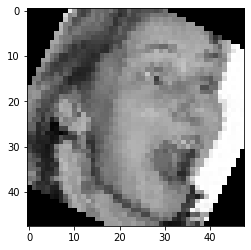

In [ ]:
for img, l in train_dl:
    print(img[0].shape)
    print(l[0], digit_to_classname(l[0]))
    plt.imshow(img[0].permute(1, 2, 0)[:,:,0], cmap='gray')
    break

Создадим функцию для просмотра случайных картинок из получившегося датасета:

In [ ]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        print(images[0].shape)
        ax.imshow(make_grid(images[:64], nrow=8).permute(1, 2, 0))
        break

torch.Size([1, 48, 48])


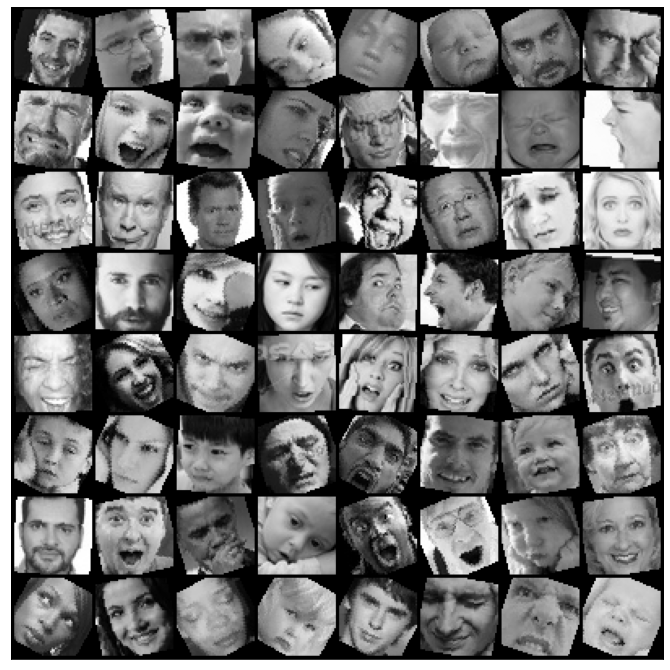

In [ ]:
show_batch(train_dl)

Узнаем какое оборудование у нас:

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

Шаг 2. Опишем модель

Опишем нашу модель для распознавания эмоций:

In [ ]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ELU(inplace=True)]
    if pool:
        layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)


class ResNet(nn.Module):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 128)
        self.conv2 = conv_block(128, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        self.drop1 = nn.Dropout(0.5)
        
        self.conv3 = conv_block(128, 256)
        self.conv4 = conv_block(256, 256, pool=True)
        self.res2 = nn.Sequential(conv_block(256, 256), conv_block(256, 256))
        self.drop2 = nn.Dropout(0.5)
        
        self.conv5 = conv_block(256, 512)
        self.conv6 = conv_block(512, 512, pool=True)
        self.res3 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        self.drop3 = nn.Dropout(0.5)
        
        self.classifier = nn.Sequential(nn.MaxPool2d(6), 
                                        nn.Flatten(),
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.drop1(out)
        
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.drop2(out)
        
        out = self.conv5(out)
        out = self.conv6(out)
        out = self.res3(out) + out
        out = self.drop3(out)
        
        out = self.classifier(out)
        return out

BatchNorm2d - вывод со сверточного слоя может быть довольно большим, что может негативно повлиять на нашу модель. А этот слой просто нормализует полученные данные.

ELU - можно использовать и Relu.

In [ ]:
model = ResNet(1, len(classes_train)).to(device)

In [ ]:
model

ResNet(
  (conv1): Sequential(
    (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0, inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0, inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ELU(alpha=1.0, inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=

Шаг 3. Обучение

In [ ]:
epochs = 5
max_lr = 0.001
optimizer = torch.optim.Adam(model.parameters(), max_lr)

In [ ]:
epoch_losses = []

for epoch in range(epochs):
    
    running_loss = 0.0
    epoch_loss = []
    for batch_idx, (data, labels) in enumerate(train_dl):
        data = data.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(data)
        loss = F.cross_entropy(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        epoch_loss.append(loss.item())
        
    test_running_loss = 0
    test_epoch_loss = []
    for batch_idx, (data, labels) in enumerate(test_dl):
        model.eval()
        data = data.to(device)
        labels = labels.to(device)
        
        outputs = model(data)
        loss = F.cross_entropy(outputs, labels)
                
        test_running_loss += loss.item()
        test_epoch_loss.append(loss.item())
        
        
    print(f'Epoch {epoch+1}, loss: ', np.mean(epoch_loss), 'test loss:', np.mean(test_epoch_loss))
    epoch_losses.append(epoch_loss)

Epoch 1, loss:  3.6447508968083207 test loss: 1.8222464980750248
Epoch 2, loss:  1.7884419175375879 test loss: 1.7938940113988415
Epoch 3, loss:  1.774920833849274 test loss: 1.7818759063194538
Epoch 4, loss:  1.747345923322492 test loss: 1.8306031720391636
Epoch 5, loss:  1.6896240679563674 test loss: 1.6008681839910046


Посмотрим на нашу ошибку в процессе обучения:

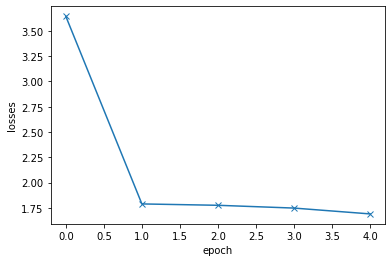

In [ ]:
losses = [np.mean(loss) for loss in epoch_losses]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('losses');

Сохраним нашу модель:

In [ ]:
torch.save(model, './emotion_detection_model_state.pth')

Теперь давайте загрузим ее и будем использовать:

In [ ]:
net = torch.load('./emotion_detection_model_state.pth')
net.eval()

ResNet(
  (conv1): Sequential(
    (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0, inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0, inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ELU(alpha=1.0, inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=

Прогоним нашу нейронную сеть через тестовый датасет:

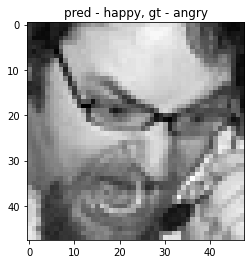

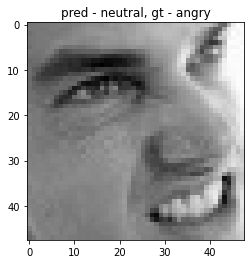

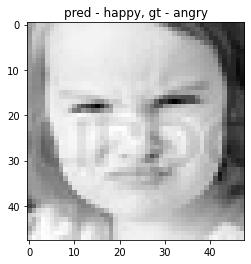

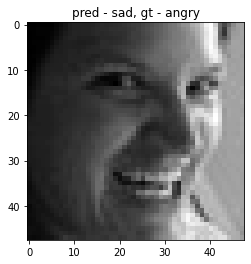

In [ ]:
with torch.no_grad():
    for i, data in enumerate(test_dl, 3):
        images, labels = data[0].to(device), data[1].to(device)
        
        outputs = net(images)
        plt.title(f'pred - {digit_to_classname(outputs[0].argmax())}, gt - {digit_to_classname(labels[0])}')
        plt.imshow(images[0].cpu().squeeze(), cmap='gray')
        plt.show()
        if i>5:
            break

Напишем скрипт, в котором мы построим пайплайн распознавания эмоций найденного лица с изображения.

In [ ]:
!pip install facenet_pytorch

     |████████████████████████████████| 1.9 MB 5.2 MB/s 


In [ ]:
import cv2
import torch
import numpy as np
from facenet_pytorch import MTCNN

    
class FaceDetector(object):
    """
    Face detector class
    """

    def __init__(self, mtcnn):
        self.mtcnn = mtcnn
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        self.emodel = torch.load('./emotion_detection_model_state.pth')
        self.emodel.eval()

    def _draw(self, frame, boxes, probs, landmarks, emotions):
        """
        Draw landmarks and boxes for each face detected
        """
        try:
            for box, prob, ld, emotion in zip(boxes, probs, landmarks, emotions):
                # Draw rectangle on frame
                cv2.rectangle(frame,
                              (box[0], box[1]),
                              (box[2], box[3]),
                              (0, 0, 255),
                              thickness=2)

                # Show probability
                cv2.putText(frame, 
                    emotion, (box[2], box[3]), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

                # Draw landmarks
                cv2.circle(frame, tuple(ld[0]), 5, (0, 0, 255), -1)
                cv2.circle(frame, tuple(ld[1]), 5, (0, 0, 255), -1)
                cv2.circle(frame, tuple(ld[2]), 5, (0, 0, 255), -1)
                cv2.circle(frame, tuple(ld[3]), 5, (0, 0, 255), -1)
                cv2.circle(frame, tuple(ld[4]), 5, (0, 0, 255), -1)
        except:
            pass

        return frame
    
    @staticmethod
    def crop_faces(frame, boxes):
        faces = []
        for i, box in enumerate(boxes):
            # plt.imshow(frame[int(box[1]):int(box[3]), int(box[0]):int(box[2])])
            # plt.show()
            faces.append(frame[int(box[1]):int(box[3]), 
                int(box[0]):int(box[2])])
        return faces
    
    @staticmethod
    def digit_to_classname(digit):
        if digit == 0:
            return 'sad'
        elif digit == 1:
            return 'disgust'
        elif digit == 2:
            return 'happy'
        elif digit == 3:
            return 'surprise'
        elif digit == 4:
            return 'neutral'
        elif digit == 5:
            return 'fear'
        elif digit == 6:
            return 'angry'
       

    def run(self, path_to_img):
        """
            Run the FaceDetector and draw landmarks and boxes around detected faces
        """                
        frame = cv2.imread(path_to_img)
        
        
        # detect face box, probability and landmarks
        boxes, probs, landmarks = self.mtcnn.detect(frame, landmarks=True)
        print(boxes)

        faces = self.crop_faces(frame, boxes)
        emotions = []
        for face in faces:
            face = cv2.resize(face,(48,48))
            face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
            
            torch_face = torch.from_numpy(face).unsqueeze(0).to(self.device).float()
            emotion = self.emodel(torch_face[None, ...])
            emotion = self.digit_to_classname(emotion.argmax())
            emotions.append(emotion)

        # draw on frame
        self._draw(frame, boxes, probs, landmarks, emotions)
    
        # Show the frame
        cv2.imwrite('Face_Detection.png', frame)
        plt.figure(figsize=(20, 10))
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.show()
        
        
# Run the app
mtcnn = MTCNN()
fcd = FaceDetector(mtcnn)

In [ ]:
!wget 'https://phonoteka.org/uploads/posts/2021-05/1620322801_51-phonoteka_org-p-emotsionalnii-fon-vidi-54.jpg' -O test.png

--2022-04-19 17:58:48--  https://phonoteka.org/uploads/posts/2021-05/1620322801_51-phonoteka_org-p-emotsionalnii-fon-vidi-54.jpg
Resolving phonoteka.org (phonoteka.org)... 178.33.214.152
Connecting to phonoteka.org (phonoteka.org)|178.33.214.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 245053 (239K) [image/jpeg]
Saving to: ‘test.png’

test.png            100%[===================>] 239.31K   601KB/s    in 0.4s    

2022-04-19 17:58:49 (601 KB/s) - ‘test.png’ saved [245053/245053]



[[ 918.07513   530.09265  1081.8768    757.7806  ]
 [1843.3049     85.23267  2013.6783    300.6677  ]
 [1798.6978    526.5316   1949.8287    750.5687  ]
 [ 488.57608   101.32649   637.6932    301.98798 ]
 [ 925.06476   106.45472  1079.4302    297.92706 ]
 [  35.6394    102.41324   184.06708   300.06073 ]
 [ 466.0393    554.1274    616.29865   746.5414  ]
 [  38.23874   548.7638    187.43846   740.87103 ]
 [1361.8834    548.46967  1508.1572    739.9438  ]
 [1372.5715    103.342926 1514.7317    288.66855 ]]


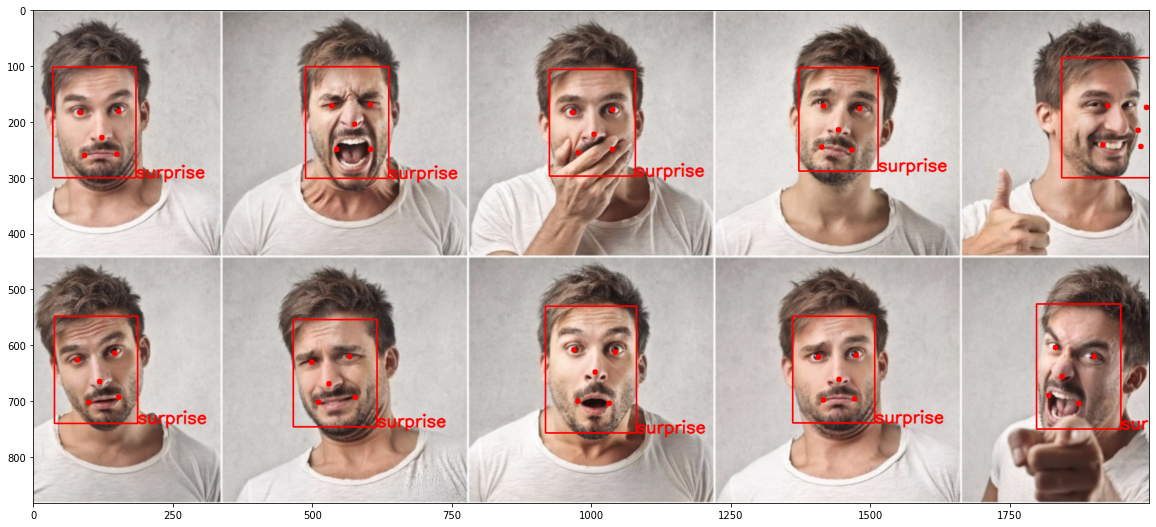

In [ ]:
import matplotlib.pyplot as plt

fcd.run('test.png')

Здесь со своей вебкамеры я ловлю кадры. На каждом кадре я нахожу лица и для каждого лица определяю эмоцию. И все это рисую прямо на кадре и отображаю через cv2.imshow:

Ниже код для локального запуска считывания кадров с вебкамеры, если работаете на colab, то можете ознакомиться с этими материалами:
1. https://www.youtube.com/watch?v=YjWh7QvVH60
2. https://stackoverflow.com/questions/54389727/opening-web-camera-in-google-colab
3. https://colab.research.google.com/drive/1QnC7lV7oVFk5OZCm75fqbLAfD9qBy9bw?usp=sharing

In [ ]:
import cv2
import torch
import numpy as np
from facenet_pytorch import MTCNN

cap = cv2.VideoCapture(0)  
    
class FaceDetector(object):
    """
    Face detector class
    """

    def __init__(self, mtcnn):
        self.mtcnn = mtcnn
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        self.emodel = torch.load('./emotion_detection_model_state.pth')
        self.emodel.eval()

    def _draw(self, frame, boxes, probs, landmarks, emotions):
        """
        Draw landmarks and boxes for each face detected
        """
        try:
            for box, prob, ld, emotion in zip(boxes, probs, landmarks, emotions):
                # Draw rectangle on frame
                cv2.rectangle(frame,
                              (box[0], box[1]),
                              (box[2], box[3]),
                              (0, 0, 255),
                              thickness=2)

                # Show probability
                cv2.putText(frame, 
                    emotion, (box[2], box[3]), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

                # Draw landmarks
                cv2.circle(frame, tuple(ld[0]), 5, (0, 0, 255), -1)
                cv2.circle(frame, tuple(ld[1]), 5, (0, 0, 255), -1)
                cv2.circle(frame, tuple(ld[2]), 5, (0, 0, 255), -1)
                cv2.circle(frame, tuple(ld[3]), 5, (0, 0, 255), -1)
                cv2.circle(frame, tuple(ld[4]), 5, (0, 0, 255), -1)
        except:
            pass

        return frame
    
    @staticmethod
    def crop_faces(frame, boxes):
        faces = []
        for i, box in enumerate(boxes):
            faces.append(frame[int(box[1]):int(box[3]), 
                int(box[0]):int(box[2])])
        return faces
    
    @staticmethod
    def digit_to_classname(digit):
        if digit == 0:
            return 'sad'
        elif digit == 1:
            return 'disgust'
        elif digit == 2:
            return 'happy'
        elif digit == 3:
            return 'surprise'
        elif digit == 4:
            return 'neutral'
        elif digit == 5:
            return 'fear'
        elif digit == 6:
            return 'angry'
       

    def run(self):
        """
            Run the FaceDetector and draw landmarks and boxes around detected faces
        """                

        while True:
            ret, frame = cap.read()
            try:
                # detect face box, probability and landmarks
                boxes, probs, landmarks = self.mtcnn.detect(frame, landmarks=True)

                face = self.crop_faces(frame, boxes)[0]
                face = cv2.resize(face,(48,48))
                face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
                torch_face = torch.from_numpy(face).unsqueeze(0).to(self.device).float()
                emotion = self.emodel(torch_face[None, ...])
                emotion = self.digit_to_classname(emotion.argmax())

                # draw on frame
                self._draw(frame, boxes, probs, landmarks, emotion)

            except:
                pass

            # Show the frame
            cv2.imshow('Face Detection', frame)

            if cv2.waitKey(0):
                break

        cap.release()
        cv2.destroyAllWindows()
        
        
# Run the app
mtcnn = MTCNN()
fcd = FaceDetector(mtcnn)
fcd.run()

## **Задание по итогам курса:**

- (упрощенное/для тех, у кого нет вебкамеры)
    1. Нужно написать приложение, которое будет получать на вход *изображение*.
    2. В процессе определять, что перед камерой находится человек, задетектировав его лицо на кадре.
    3. На изображении человек показывает жесты руками, а алгоритм должен считать их и классифицировать.

- (более сложное)
    1. Нужно написать приложение, которое будет считывать и выводить кадры с *веб-камеры*.
    2. В процессе считывания определять что перед камерой находится человек, задетектировав его лицо на кадре.
    3. Человек показывает жесты руками, а алгоритм должен считать их и классифицировать. 
____________________
- Для распознавания жестов, вам надо будет скачать датасет https://www.kaggle.com/gti-upm/leapgestrecog, разработать модель для обучения и обучить эту модель.
- Как работать с веб-камерой на google colab https://stackoverflow.com/questions/54389727/opening-web-camera-in-google-colab


У кого нет возможности работать через каггл (нет верификации), то можете данные взять по ссылке: https://disk.yandex.ru/d/R2PGlaXDf6_HzQ